## TensorFlow 编程概念
**学习目标**
 - 学习TensorFlow编程的模型的重点知识，重点了解以下几个概念：
  - 张量(Tensor)
  - 指令(Operations)
  - 图(Graph)
  - 会话(Session)
 - 构建一个简单的TensorFlow程序，使用该程序绘制一个默认图并创建一个运行图的会话。
 

### 概念解释
#### 张量
TensorFlow的名称源自**张量**，张量是任意维度的数组。大多数情况下，我们会使用低维张量：
 - 标量是零维数组 (零阶张量)，e.g. 'Kevin' or 5
 - 矢量是一维数组 (一阶张量)，e.g. [2, 3, 4, 5] or [5]
 - 矩阵是二维数组 (二阶张量)，e.g. [[1.1, 2.2, 3.3], [4.4, 5.5, 6.6]]
 
#### 指令
TensorFlow中大多数行大都是指令，用于创建、销毁和操控张量。
 
#### 图
也称**计算图或数据流图**，TensorFlow程序可以选择创建多个图，图的节点是**指令**，图的边是**张量**。张量流经图，在每个节点由一个指令操控。一个指令的输出张量通常会变成后续指令的输入张量。TensorFlow 会实现延迟执行模型，意味着系统仅会根据相关节点的需求在需要时计算节点。
 
张量可以作为常量或变量存储在图中。**常量**存储的是值不会发生更改的张量，而**变量**存储的是值会发生更改的张量。不过，常量和变量都只是图中的一种指令。常量是始终会返回同一张量值的指令。变量是会返回分配给它的任何张量的指令。

In [1]:
import tensorflow as tf
x = tf.constant([2.2])  # 创建常量
y = tf.Variable([5])  # 创建变量

y2 = tf.Variable([0])  # 先定义
y2 = y2.assign([5])  # 再赋值

# 图要在会话里运行
with tf.Session() as sess:
    initialization = tf.global_variables_initializer()
    print("Output: {}".format(y2.eval()))


/Users/kevin/.virtualenvs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Output: [5]


## 总结
TensorFlow的使用可以分为两步：
1. 组装**常量**，**变量**，和**指令**到**图**中。
2. 在一个会话中Eval这些东西。

## 创建一个简单的TensorFlow程序
> 编写一个两数相加程序

### 导入常用重要的库

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt  # 可视化数据库
import numpy as np  # 低阶数学运算库
import pandas as pd  # 高阶数学运算库

TensorFlow会提供**默认图**，但是我们建议明确地创建我们自己的图。

In [3]:
g = tf.Graph()  # 创建图

with g.as_default():
    # 组装图
    x = tf.constant(8, name="x_const")
    y = tf.constant(5, name="y_const")
    kl_sum = tf.add(x, y ,name="x_y_sum")
    
    # 建立会话
    with tf.Session() as sess:
        print("Output: %d" % kl_sum.eval())

Output: 13


#### 练习：引入第三个运算元
修改上面的代码，添加第三个整数
 1. 定义第三个标量整形常数z，赋值为4
 2. 添加z到kl_sum得到一个新的求和
 3. 重新运行

In [4]:
g = tf.Graph()

with g.as_default():
    x = tf.constant(8, name="x_const")
    y = tf.constant(5, name="y_const")
    kl_sum = tf.add(x, y, name="x_y_sum")
    
    z = tf.constant(4, name="z_cosnt")
    kl2_sum = tf.add(kl_sum, z, name="kl_sum_z_sum")
    
    with tf.Session() as sess:
        print("Output: %d" % kl2_sum.eval())

Output: 17


## 曼德尔布罗特 集合(Mandelbrot Set)
可视化这个集合与机器学习并没有关系，但是可以作为一个学习使用TF进行数学运算的有趣的例子。

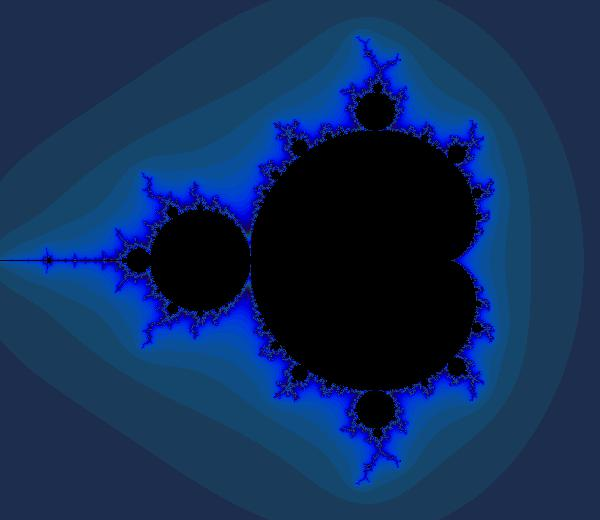

In [5]:
import tensorflow as tf
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
    """显示一个迭代数组计数作为一个多彩的分形图片"""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic), 30+50*np.sin(a_cyclic), 155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
sess =tf.InteractiveSession()

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

tf.global_variables_initializer().run()

zs_ = zs*zs +xs

not_diverged = tf.abs(zs_) < 4

step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)))

for i in range(200): 
    step.run()

DisplayFractal(ns.eval())